In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import torch

In [3]:
import sys
sys.path.append('..')
from src.utils import (calculate_bs, fix_predictions, plot_brier)
from src.data.dataset import SurvivalDataset

In [4]:
!ls ../data/raw/*.rda

../data/raw/cancer.rda      ../data/raw/reliability.rda
../data/raw/cgd.rda         ../data/raw/retinopathy.rda
../data/raw/diabetic.rda    ../data/raw/rhDNase.rda
../data/raw/flchain.rda     ../data/raw/solder.rda
../data/raw/heart.rda       ../data/raw/survexp.rda
../data/raw/logan.rda       ../data/raw/tobin.rda
../data/raw/nafld.rda       ../data/raw/transplant.rda
../data/raw/nwtco.rda       ../data/raw/udca.rda
../data/raw/pbc.rda


In [5]:
import pyreadr

rda_file_path = '../data/raw/pbc.rda'
data = pyreadr.read_r(rda_file_path)['pbc']
data.head()

,id,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
0,1,400,2,1,58.765229,f,1,1,1,1.0,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
1,2,4500,0,1,56.446270,f,0,1,1,0.0,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
2,3,1012,2,1,70.072553,m,0,0,0,0.5,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
3,4,1925,2,1,54.740589,f,0,1,1,0.5,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
4,5,1504,1,2,38.105407,f,0,1,1,0.0,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3


In [6]:
data = SurvivalDataset(fname='pbc.rda')
X_train, X_test, y_train, y_test = data.get_tensors()

Succesfully created time tensor of shape: torch.Size([418, 4795])
(334, 769) torch.Size([334, 4795])


In [7]:
from src.models.model import VSpyct

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
model = VSpyct(max_depth=3, bs=64)
model.fit(X_train, y_train)#, clustering_data=torch.cat((X_train, y_train), axis=1))

Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   2%|▏         | 3/150 [00:00<00:15,  9.48it/s]

[iteration 0001] loss: 559186853068.8000
[iteration 0002] loss: 519822304460.8000
[iteration 0003] loss: 465406299340.8000
[iteration 0004] loss: 435370852556.8000


Epochs:   5%|▍         | 7/150 [00:00<00:10, 13.82it/s]

[iteration 0005] loss: 398426380697.6000
[iteration 0006] loss: 364195355648.0000
[iteration 0007] loss: 337104989388.8000
[iteration 0008] loss: 309433031065.6000


Epochs:   7%|▋         | 11/150 [00:00<00:09, 15.06it/s]

[iteration 0009] loss: 275664815308.8000
[iteration 0010] loss: 254295885260.8000
[iteration 0011] loss: 237239501312.0000
[iteration 0012] loss: 218385530009.6000


Epochs:  10%|█         | 15/150 [00:01<00:08, 16.02it/s]

[iteration 0013] loss: 203979867392.0000
[iteration 0014] loss: 187717304012.8000
[iteration 0015] loss: 171449257177.6000
[iteration 0016] loss: 160382278502.4000


Epochs:  13%|█▎        | 19/150 [00:01<00:07, 16.54it/s]

[iteration 0017] loss: 152877584992.0000
[iteration 0018] loss: 138819090534.4000
[iteration 0019] loss: 128854571763.2000
[iteration 0020] loss: 122000681030.4000


Epochs:  15%|█▌        | 23/150 [00:01<00:07, 16.81it/s]

[iteration 0021] loss: 111072281164.8000
[iteration 0022] loss: 109292314098.5000
[iteration 0023] loss: 100893111149.6250
[iteration 0024] loss: 95934810013.7500


Epochs:  18%|█▊        | 27/150 [00:01<00:07, 16.56it/s]

[iteration 0025] loss: 90784216645.1938
[iteration 0026] loss: 85087375452.3687
[iteration 0027] loss: 81820494027.0500
[iteration 0028] loss: 76387224701.3500


Epochs:  21%|██        | 31/150 [00:02<00:07, 16.85it/s]

[iteration 0029] loss: 73272970291.8094
[iteration 0030] loss: 71217978762.5078
[iteration 0031] loss: 69576514914.8000
[iteration 0032] loss: 63815168058.4625


Epochs:  23%|██▎       | 35/150 [00:02<00:06, 16.97it/s]

[iteration 0033] loss: 64489844266.4500
[iteration 0034] loss: 62766774047.7000
[iteration 0035] loss: 59101556705.0000
[iteration 0036] loss: 58715308247.0062


Epochs:  26%|██▌       | 39/150 [00:02<00:06, 16.98it/s]

[iteration 0037] loss: 56422185748.3980
[iteration 0038] loss: 55390704011.6656
[iteration 0039] loss: 53510105931.9250
[iteration 0040] loss: 53814456966.0000


Epochs:  29%|██▊       | 43/150 [00:02<00:06, 17.15it/s]

[iteration 0041] loss: 52369022946.2000
[iteration 0042] loss: 53371967956.8390
[iteration 0043] loss: 51717961764.7693
[iteration 0044] loss: 49970508021.7000


Epochs:  31%|███▏      | 47/150 [00:02<00:06, 16.99it/s]

[iteration 0045] loss: 50139023309.4500
[iteration 0046] loss: 48410057228.4676
[iteration 0047] loss: 48926793830.3622
[iteration 0048] loss: 47550533388.4500


Epochs:  34%|███▍      | 51/150 [00:03<00:05, 17.00it/s]

[iteration 0049] loss: 47293970154.7133
[iteration 0050] loss: 48963440921.0676
[iteration 0051] loss: 48028228823.5000
[iteration 0052] loss: 46726484551.4664


Epochs:  37%|███▋      | 55/150 [00:03<00:05, 17.16it/s]

[iteration 0053] loss: 46125078114.6250
[iteration 0054] loss: 44951512018.8000
[iteration 0055] loss: 46660069476.8906
[iteration 0056] loss: 47927222056.6500


Epochs:  37%|███▋      | 56/150 [00:03<00:05, 15.79it/s]


Early stopping at epoch 56.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   2%|▏         | 3/150 [00:00<00:05, 26.76it/s]

[iteration 0001] loss: 127311690137.6000
[iteration 0002] loss: 119595154227.2000
[iteration 0003] loss: 108538600857.6000
[iteration 0004] loss: 99872846233.6000
[iteration 0005] loss: 93182531993.6000
[iteration 0006] loss: 85833776947.2000


Epochs:   7%|▋         | 11/150 [00:00<00:04, 31.42it/s]

[iteration 0007] loss: 82087918796.8000
[iteration 0008] loss: 74437243801.6000
[iteration 0009] loss: 68301756416.0000
[iteration 0010] loss: 66079765145.6000
[iteration 0011] loss: 60608257536.0000
[iteration 0012] loss: 54453023436.8000
[iteration 0013] loss: 53435243212.8000


Epochs:  13%|█▎        | 19/150 [00:00<00:04, 32.55it/s]

[iteration 0014] loss: 48344324838.4000
[iteration 0015] loss: 42285057049.6000
[iteration 0016] loss: 41293150259.2000
[iteration 0017] loss: 33253902016.0000
[iteration 0018] loss: 32054110617.6000
[iteration 0019] loss: 30908728550.4000
[iteration 0020] loss: 28784525312.0000


Epochs:  15%|█▌        | 23/150 [00:00<00:03, 32.63it/s]

[iteration 0021] loss: 26649201817.6000
[iteration 0022] loss: 23168153779.2000
[iteration 0023] loss: 23467518636.8000
[iteration 0024] loss: 23290257369.6000
[iteration 0025] loss: 19685694409.6000
[iteration 0026] loss: 19469246040.0000


Epochs:  18%|█▊        | 27/150 [00:00<00:03, 32.89it/s]

[iteration 0027] loss: 17212410594.0500


Epochs:  21%|██        | 31/150 [00:00<00:03, 32.90it/s]

[iteration 0028] loss: 15821053078.4000
[iteration 0029] loss: 15182953872.0000
[iteration 0030] loss: 14017169755.4000
[iteration 0031] loss: 13237776792.7047
[iteration 0032] loss: 12470358778.4501
[iteration 0033] loss: 11829007120.4000
[iteration 0034] loss: 11064890958.4000


Epochs:  26%|██▌       | 39/150 [00:01<00:03, 33.14it/s]

[iteration 0035] loss: 10593492584.8000
[iteration 0036] loss: 10463774598.3000
[iteration 0037] loss: 10003415272.0822
[iteration 0038] loss: 8637486872.1000
[iteration 0039] loss: 8380981279.0875
[iteration 0040] loss: 9376996597.0000
[iteration 0041] loss: 8521831569.8875


Epochs:  31%|███▏      | 47/150 [00:01<00:03, 33.38it/s]

[iteration 0042] loss: 7271483713.4453
[iteration 0043] loss: 7110343529.7156
[iteration 0044] loss: 6945075680.9000
[iteration 0045] loss: 7946005850.0282
[iteration 0046] loss: 6742448762.6641
[iteration 0047] loss: 6285907441.3953
[iteration 0048] loss: 6530319779.6812


Epochs:  33%|███▎      | 49/150 [00:01<00:03, 31.96it/s]


[iteration 0049] loss: 6951092546.4410
Early stopping at epoch 49.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   4%|▍         | 6/150 [00:00<00:02, 54.35it/s]

[iteration 0001] loss: 83537102028.8000
[iteration 0002] loss: 77957411840.0000
[iteration 0003] loss: 77562138214.4000
[iteration 0004] loss: 75862874112.0000
[iteration 0005] loss: 75007838208.0000
[iteration 0006] loss: 74235169382.4000
[iteration 0007] loss: 68911396044.8000
[iteration 0008] loss: 67204667596.8000
[iteration 0009] loss: 65592538726.4000
[iteration 0010] loss: 59035189043.2000
[iteration 0011] loss: 59329696358.4000
[iteration 0012] loss: 58809693593.6000


Epochs:  12%|█▏        | 18/150 [00:00<00:02, 54.36it/s]

[iteration 0013] loss: 58565743616.0000
[iteration 0014] loss: 55805122150.4000
[iteration 0015] loss: 57797051392.0000
[iteration 0016] loss: 55402889420.8000
[iteration 0017] loss: 50390274252.8000
[iteration 0018] loss: 49567215104.0000
[iteration 0019] loss: 49467832115.2000
[iteration 0020] loss: 47089352396.8000
[iteration 0021] loss: 48323693363.2000
[iteration 0022] loss: 44625992499.2000
[iteration 0023] loss: 44147158425.6000
[iteration 0024] loss: 43545518387.2000


Epochs:  16%|█▌        | 24/150 [00:00<00:02, 54.12it/s]

[iteration 0025] loss: 42335884697.6000
[iteration 0026] loss: 42283742310.4000
[iteration 0027] loss: 41022980608.0000
[iteration 0028] loss: 37986883379.2000
[iteration 0029] loss: 37094419251.2000


Epochs:  20%|██        | 30/150 [00:00<00:02, 54.45it/s]

[iteration 0030] loss: 36222649139.2000


Epochs:  23%|██▎       | 35/150 [00:00<00:02, 52.82it/s]

[iteration 0031] loss: 36687142809.6000
[iteration 0032] loss: 37125102796.8000
[iteration 0033] loss: 32478125619.2000
[iteration 0034] loss: 33365631027.2000
[iteration 0035] loss: 32595298252.8000
Early stopping at epoch 35.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

[iteration 0001] loss: 83530509926.4000
[iteration 0002] loss: 81507434291.2000
[iteration 0003] loss: 77291051417.6000
[iteration 0004] loss: 70527235276.8000
[iteration 0005] loss: 68798299750.4000


Epochs:   4%|▍         | 6/150 [00:00<00:02, 49.83it/s]

[iteration 0006] loss: 66331018342.4000
[iteration 0007] loss: 62894411673.6000
[iteration 0008] loss: 61600013312.0000
[iteration 0009] loss: 57667490406.4000


Epochs:   7%|▋         | 11/150 [00:00<00:02, 49.85it/s]

[iteration 0010] loss: 56805541580.8000
[iteration 0011] loss: 53722699776.0000
[iteration 0012] loss: 48613212569.6000
[iteration 0013] loss: 47783538739.2000
[iteration 0014] loss: 45569935462.4000
[iteration 0015] loss: 43556306585.6000
[iteration 0016] loss: 41142035763.2000


Epochs:  11%|█▏        | 17/150 [00:00<00:02, 49.85it/s]

[iteration 0017] loss: 41751995648.0000
[iteration 0018] loss: 35176742092.8000
[iteration 0019] loss: 37010426470.4000
[iteration 0020] loss: 36565792768.0000


Epochs:  15%|█▍        | 22/150 [00:00<00:02, 49.76it/s]

[iteration 0021] loss: 30338243686.4000
[iteration 0022] loss: 31554038476.8000
[iteration 0023] loss: 31830795980.8000
[iteration 0024] loss: 28110805273.6000
[iteration 0025] loss: 27966351155.2000
[iteration 0026] loss: 25413878348.8000
[iteration 0027] loss: 25226759961.6000


Epochs:  18%|█▊        | 27/150 [00:00<00:02, 49.84it/s]

[iteration 0028] loss: 23840945459.2000
[iteration 0029] loss: 22408097945.6000
[iteration 0030] loss: 21638841932.8000
[iteration 0031] loss: 20491573286.4000


Epochs:  22%|██▏       | 33/150 [00:00<00:02, 50.00it/s]

[iteration 0032] loss: 17842483622.4000
[iteration 0033] loss: 18861988633.6000
[iteration 0034] loss: 17317831897.6000
[iteration 0035] loss: 15577119116.8000


Epochs:  25%|██▌       | 38/150 [00:00<00:02, 49.76it/s]

[iteration 0036] loss: 16563080793.6000
[iteration 0037] loss: 14382057433.6000
[iteration 0038] loss: 13726013622.4000
[iteration 0039] loss: 13688317561.6000
[iteration 0040] loss: 14457927650.0000
[iteration 0041] loss: 12192137363.2000
[iteration 0042] loss: 11180726190.4000
[iteration 0043] loss: 12741265843.2000
[iteration 0044] loss: 11413586036.8000


Epochs:  29%|██▉       | 44/150 [00:00<00:02, 48.59it/s]


Early stopping at epoch 44.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

[iteration 0001] loss: 469055000985.6000
[iteration 0002] loss: 448671986892.8000


Epochs:   3%|▎         | 4/150 [00:00<00:04, 31.48it/s]

[iteration 0003] loss: 432445189734.4000
[iteration 0004] loss: 416630858137.6000
[iteration 0005] loss: 414161708646.4000
[iteration 0006] loss: 395944824422.4000
[iteration 0007] loss: 381732727193.6000


Epochs:   5%|▌         | 8/150 [00:00<00:04, 32.72it/s]

[iteration 0008] loss: 375735727308.8000
[iteration 0009] loss: 365385291366.4000
[iteration 0010] loss: 349390270873.6000
[iteration 0011] loss: 342708039680.0000


Epochs:   8%|▊         | 12/150 [00:00<00:04, 32.94it/s]

[iteration 0012] loss: 332008642764.8000
[iteration 0013] loss: 323137673216.0000
[iteration 0014] loss: 308181771468.8000


Epochs:  11%|█         | 16/150 [00:00<00:04, 33.09it/s]

[iteration 0015] loss: 298088890572.8000
[iteration 0016] loss: 291391460556.8000
[iteration 0017] loss: 280177492172.8000
[iteration 0018] loss: 282184673075.2000


Epochs:  13%|█▎        | 20/150 [00:00<00:03, 33.16it/s]

[iteration 0019] loss: 267259686502.4000
[iteration 0020] loss: 261105322393.6000
[iteration 0021] loss: 250582131712.0000
[iteration 0022] loss: 244740927078.4000
[iteration 0023] loss: 238254728089.6000


Epochs:  16%|█▌        | 24/150 [00:00<00:03, 33.04it/s]

[iteration 0024] loss: 226941421772.8000
[iteration 0025] loss: 222188391526.4000
[iteration 0026] loss: 219836893593.6000
[iteration 0027] loss: 211901941145.6000


Epochs:  19%|█▊        | 28/150 [00:00<00:03, 33.28it/s]

[iteration 0028] loss: 206154891878.4000
[iteration 0029] loss: 200557394534.4000
[iteration 0030] loss: 197195787366.4000


Epochs:  21%|██▏       | 32/150 [00:00<00:03, 33.30it/s]

[iteration 0031] loss: 193766579609.6000
[iteration 0032] loss: 189325687552.0000
[iteration 0033] loss: 179633963980.8000
[iteration 0034] loss: 178788062592.0000
[iteration 0035] loss: 170905066803.2000


Epochs:  24%|██▍       | 36/150 [00:01<00:03, 33.19it/s]

[iteration 0036] loss: 161986941337.6000
[iteration 0037] loss: 162529749376.0000
[iteration 0038] loss: 158855348992.0000
[iteration 0039] loss: 154762755993.6000


Epochs:  27%|██▋       | 40/150 [00:01<00:03, 33.31it/s]

[iteration 0040] loss: 151576455116.8000
[iteration 0041] loss: 147644265881.6000
[iteration 0042] loss: 142023574681.6000


Epochs:  29%|██▉       | 44/150 [00:01<00:03, 33.35it/s]

[iteration 0043] loss: 136597066745.6000
[iteration 0044] loss: 133730720614.4000
[iteration 0045] loss: 133022758969.6000
[iteration 0046] loss: 129906481328.0000


Epochs:  32%|███▏      | 48/150 [00:01<00:03, 33.31it/s]

[iteration 0047] loss: 131299367257.6000
[iteration 0048] loss: 123627413104.0000
[iteration 0049] loss: 122341308332.8000
[iteration 0050] loss: 116605512140.2000
[iteration 0051] loss: 115329361427.2000


Epochs:  35%|███▍      | 52/150 [00:01<00:02, 33.18it/s]

[iteration 0052] loss: 115962088033.6000
[iteration 0053] loss: 108339720990.4000
[iteration 0054] loss: 107142079303.5500
[iteration 0055] loss: 105969814796.2000


Epochs:  37%|███▋      | 56/150 [00:01<00:02, 33.36it/s]

[iteration 0056] loss: 104333211556.4000
[iteration 0057] loss: 103936396291.0000
[iteration 0058] loss: 98173111275.0000


Epochs:  40%|████      | 60/150 [00:01<00:02, 33.37it/s]

[iteration 0059] loss: 98378581228.6000
[iteration 0060] loss: 93199544400.8906
[iteration 0061] loss: 94323689438.7875
[iteration 0062] loss: 91432289762.1125
[iteration 0063] loss: 89942559160.9500


Epochs:  43%|████▎     | 64/150 [00:01<00:02, 33.34it/s]

[iteration 0064] loss: 90428985171.3000
[iteration 0065] loss: 88426331968.5500
[iteration 0066] loss: 88971094987.0000
[iteration 0067] loss: 85070931920.9500


Epochs:  45%|████▌     | 68/150 [00:02<00:02, 33.37it/s]

[iteration 0068] loss: 85723299805.5250
[iteration 0069] loss: 84738008551.8000
[iteration 0070] loss: 82116590178.0375


Epochs:  48%|████▊     | 72/150 [00:02<00:02, 33.24it/s]

[iteration 0071] loss: 77988065416.0000
[iteration 0072] loss: 79277000606.4000
[iteration 0073] loss: 79568192257.9000
[iteration 0074] loss: 77192959038.4000


Epochs:  51%|█████     | 76/150 [00:02<00:02, 33.20it/s]

[iteration 0075] loss: 75339903107.8000
[iteration 0076] loss: 75891016644.0000
[iteration 0077] loss: 72881668948.8000
[iteration 0078] loss: 74149017828.0000
[iteration 0079] loss: 72321321049.6000


Epochs:  53%|█████▎    | 80/150 [00:02<00:02, 33.14it/s]

[iteration 0080] loss: 70355244755.2000
[iteration 0081] loss: 69608496341.6000
[iteration 0082] loss: 68391974208.0000
[iteration 0083] loss: 69639436160.0000


Epochs:  56%|█████▌    | 84/150 [00:02<00:01, 33.20it/s]

[iteration 0084] loss: 68001771801.6000
[iteration 0085] loss: 65277130342.4000
[iteration 0086] loss: 66432368563.2000


Epochs:  58%|█████▊    | 87/150 [00:02<00:01, 32.82it/s]


[iteration 0087] loss: 65290843097.6000
Early stopping at epoch 87.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

[iteration 0001] loss: 214666217062.4000
[iteration 0002] loss: 217664582451.2000
[iteration 0003] loss: 214021221580.8000
[iteration 0004] loss: 213859269017.6000
[iteration 0005] loss: 209396953907.2000
[iteration 0006] loss: 206467971481.6000
[iteration 0007] loss: 205251833036.8000


Epochs:   7%|▋         | 10/150 [00:00<00:01, 97.57it/s]

[iteration 0008] loss: 203243711692.8000
[iteration 0009] loss: 202358159769.6000
[iteration 0010] loss: 194054221004.8000
[iteration 0011] loss: 191129242828.8000
[iteration 0012] loss: 195345370316.8000
[iteration 0013] loss: 188397523763.2000
[iteration 0014] loss: 198449302732.8000
[iteration 0015] loss: 189179746713.6000
[iteration 0016] loss: 186819341516.8000


Epochs:  13%|█▎        | 20/150 [00:00<00:01, 97.00it/s]

[iteration 0017] loss: 182739224166.4000
[iteration 0018] loss: 182898312806.4000
[iteration 0019] loss: 180548467097.6000
[iteration 0020] loss: 175491928883.2000
[iteration 0021] loss: 170169635635.2000


Epochs:  15%|█▌        | 23/150 [00:00<00:01, 92.67it/s]


[iteration 0022] loss: 181739867340.8000
[iteration 0023] loss: 176524753305.6000
Early stopping at epoch 23.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

[iteration 0001] loss: 242790739968.0000
[iteration 0002] loss: 237516358451.2000


Epochs:   3%|▎         | 5/150 [00:00<00:03, 47.77it/s]

[iteration 0003] loss: 232974844723.2000
[iteration 0004] loss: 225032078131.2000
[iteration 0005] loss: 213014329753.6000
[iteration 0006] loss: 214328739430.4000
[iteration 0007] loss: 210373838438.4000
[iteration 0008] loss: 205228178636.8000


Epochs:   7%|▋         | 10/150 [00:00<00:02, 48.23it/s]

[iteration 0009] loss: 201917226188.8000
[iteration 0010] loss: 187634617548.8000
[iteration 0011] loss: 196211377766.4000
[iteration 0012] loss: 187598757888.0000


Epochs:  10%|█         | 15/150 [00:00<00:02, 48.11it/s]

[iteration 0013] loss: 178797622886.4000
[iteration 0014] loss: 180059771699.2000
[iteration 0015] loss: 171730293964.8000
[iteration 0016] loss: 166037318041.6000
[iteration 0017] loss: 162535980236.8000
[iteration 0018] loss: 154580619264.0000


Epochs:  13%|█▎        | 20/150 [00:00<00:02, 48.25it/s]

[iteration 0019] loss: 154258821529.6000
[iteration 0020] loss: 150978544844.8000
[iteration 0021] loss: 152201274572.8000
[iteration 0022] loss: 142808927436.8000


Epochs:  17%|█▋        | 25/150 [00:00<00:02, 48.19it/s]

[iteration 0023] loss: 138482305843.2000
[iteration 0024] loss: 136548422860.8000
[iteration 0025] loss: 133098442342.4000
[iteration 0026] loss: 128335298969.6000
[iteration 0027] loss: 129765068800.0000
[iteration 0028] loss: 121591312793.6000


Epochs:  20%|██        | 30/150 [00:00<00:02, 48.48it/s]

[iteration 0029] loss: 120611422208.0000
[iteration 0030] loss: 117333041152.0000
[iteration 0031] loss: 114722099609.6000
[iteration 0032] loss: 113585585561.6000


Epochs:  23%|██▎       | 35/150 [00:00<00:02, 48.27it/s]

[iteration 0033] loss: 109003845632.0000
[iteration 0034] loss: 108430659788.8000
[iteration 0035] loss: 103960478105.6000
[iteration 0036] loss: 100098606080.0000
[iteration 0037] loss: 102787807641.6000
[iteration 0038] loss: 95102620672.0000


Epochs:  27%|██▋       | 40/150 [00:00<00:02, 48.44it/s]

[iteration 0039] loss: 95349188403.2000
[iteration 0040] loss: 90798219468.8000
[iteration 0041] loss: 85940654489.6000
[iteration 0042] loss: 87112828313.6000


Epochs:  30%|███       | 45/150 [00:00<00:02, 48.23it/s]

[iteration 0043] loss: 84497303347.2000
[iteration 0044] loss: 82655420006.4000
[iteration 0045] loss: 81332207411.2000
[iteration 0046] loss: 79300990361.6000
[iteration 0047] loss: 75048432435.2000
[iteration 0048] loss: 75543913881.6000


Epochs:  33%|███▎      | 50/150 [00:01<00:02, 48.31it/s]

[iteration 0049] loss: 74471519232.0000
[iteration 0050] loss: 74063169126.4000
[iteration 0051] loss: 68794426982.4000
[iteration 0052] loss: 68483067596.8000


Epochs:  37%|███▋      | 55/150 [00:01<00:01, 48.16it/s]

[iteration 0053] loss: 66800987545.6000
[iteration 0054] loss: 64878403072.0000
[iteration 0055] loss: 63068108697.6000
[iteration 0056] loss: 61621715251.2000
[iteration 0057] loss: 62037610188.8000
[iteration 0058] loss: 58036216627.2000


Epochs:  40%|████      | 60/150 [00:01<00:01, 48.16it/s]

[iteration 0059] loss: 58413935513.6000
[iteration 0060] loss: 53822483968.0000
[iteration 0061] loss: 52676744601.6000
[iteration 0062] loss: 53031260057.6000
[iteration 0063] loss: 52321824256.0000
[iteration 0064] loss: 53133920256.0000


Epochs:  43%|████▎     | 65/150 [00:01<00:01, 45.22it/s]

[iteration 0065] loss: 50956999884.8000
[iteration 0066] loss: 49047725056.0000
[iteration 0067] loss: 48012142387.2000
[iteration 0068] loss: 46416627046.4000
[iteration 0069] loss: 47566694809.6000


Epochs:  47%|████▋     | 70/150 [00:01<00:01, 46.12it/s]

[iteration 0070] loss: 44975567001.6000
[iteration 0071] loss: 44351127500.8000
[iteration 0072] loss: 41265300838.4000
[iteration 0073] loss: 43742399078.4000
[iteration 0074] loss: 39936601446.4000


Epochs:  50%|█████     | 75/150 [00:01<00:01, 46.85it/s]

[iteration 0075] loss: 39700539776.0000
[iteration 0076] loss: 38362752051.2000
[iteration 0077] loss: 38253191526.4000
[iteration 0078] loss: 36466957977.6000
[iteration 0079] loss: 37153638041.6000


Epochs:  53%|█████▎    | 80/150 [00:01<00:01, 47.42it/s]

[iteration 0080] loss: 33275398169.6000
[iteration 0081] loss: 34297956096.0000
[iteration 0082] loss: 33643746944.0000


Epochs:  55%|█████▍    | 82/150 [00:01<00:01, 47.09it/s]

Early stopping at epoch 82.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


In [9]:
preds = model.predict(X_test)

In [10]:
preds.shape

torch.Size([84, 30, 4795])

In [11]:
from spyct import Model

In [12]:
spyct_model_onetree = Model(num_trees=1)
spyct_model_onetree.fit(X_train.numpy(), y_train.numpy())
preds_spyct_onetree = spyct_model_onetree.predict(X_test.numpy())

In [13]:
spyct_model = Model()
spyct_model.fit(X_train.numpy(), y_train.numpy())
preds_spyct = spyct_model.predict(X_test.numpy())

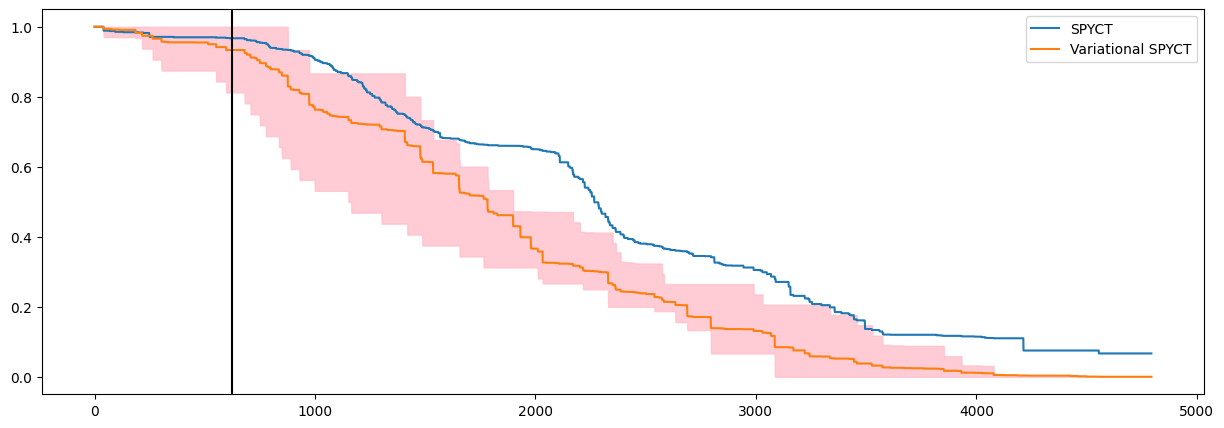

In [42]:
i = 47
plt.figure(figsize=(15,5))
plt.plot(preds_spyct[i, :], label='SPYCT')
plt.plot(preds[i, :, :].mean(axis=0), label='Variational SPYCT')

percentiles_10 = torch.quantile(preds[i, :, :], 0.1, axis=0)
percentiles_90 = torch.quantile(preds[i, :, :], 0.9, axis=0)

plt.fill_between(range(preds.shape[-1]), percentiles_10, percentiles_90, color='pink', alpha=0.8)

plt.axvline(sum(y_test[i].numpy()), color='black')

plt.legend()

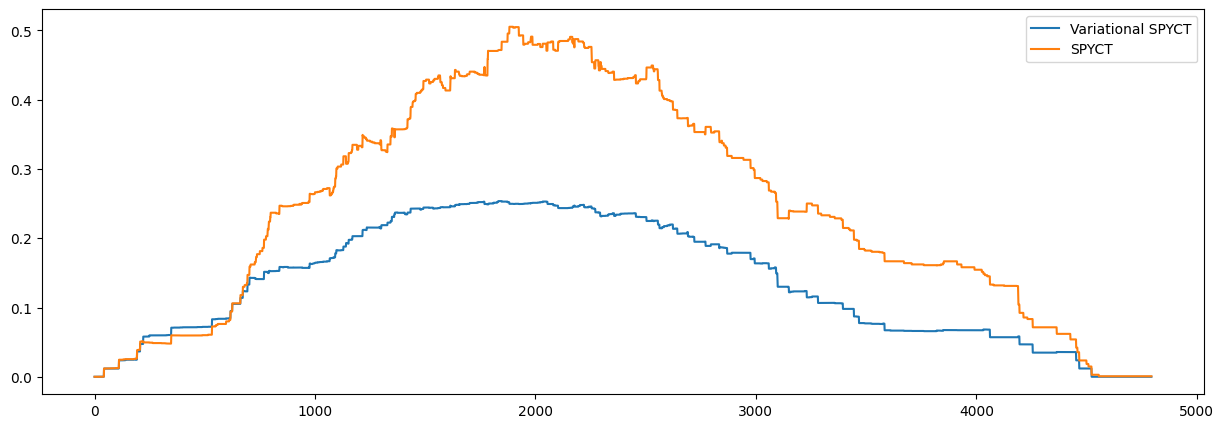

In [15]:
plot_brier(preds, preds_spyct_onetree, y_test)

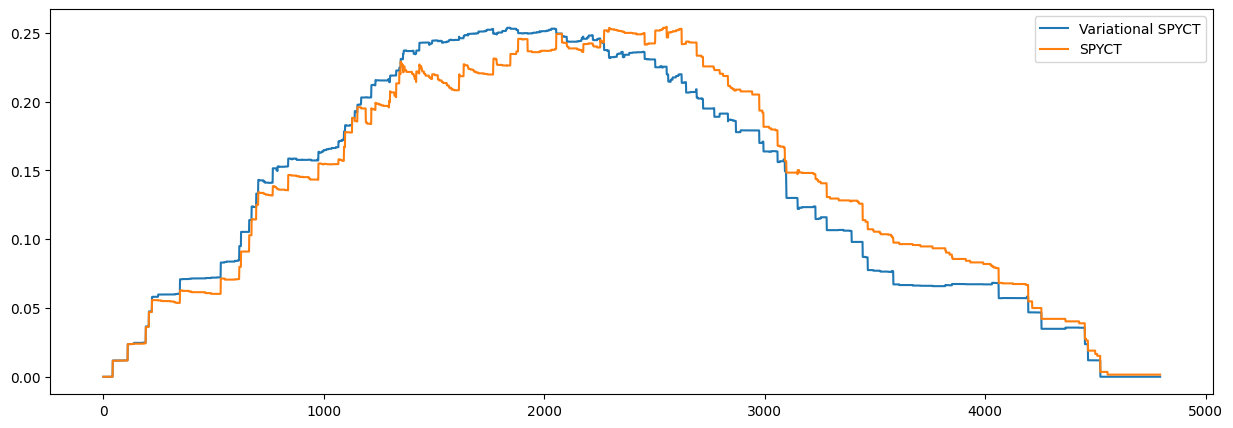

In [16]:
plot_brier(preds, preds_spyct, y_test)

In [17]:
X_train, T_train, E_train, X_test, T_test, E_test = data.pysurvival_split()

In [18]:
from pysurvival.models.semi_parametric import CoxPHModel

coxph = CoxPHModel()
coxph.fit(X_train, T_train, E_train, lr=0.01, l2_reg=1e-2, init_method='zeros')

Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 714.551 - ||grad||^2 = 404.22307
 * Iteration #2 - Loss = 698.182 - ||grad||^2 = 399.76632
 * Iteration #3 - Loss = 688.456 - ||grad||^2 = 395.63918
 * Iteration #4 - Loss = 679.989 - ||grad||^2 = 391.58569
 * Iteration #5 - Loss = 672.359 - ||grad||^2 = 387.59254
 * Iteration #6 - Loss = 665.347 - ||grad||^2 = 383.65324
 * Iteration #7 - Loss = 658.821 - ||grad||^2 = 379.76382
 * Iteration #8 - Loss = 652.692 - ||grad||^2 = 375.92157
 * Iteration #9 - Loss = 646.897 - ||grad||^2 = 372.12447
 * Iteration #10 - Loss = 641.387 - ||grad||^2 = 368.37093
 * Iteration #11 - Loss = 636.125 - ||grad||^2 = 364.65965
 * Iteration #12 - Loss = 631.082 - ||grad||^2 = 360.98954
 * Iteration #13 - Loss = 626.233 - ||grad||^2 = 357.35965
 * Iteration #14 - Loss = 621.560 - ||grad||^2 = 353.76914
 * Iteration #15 - Loss = 617.044 - ||grad||^2 = 350.21724
 * Iteration #16 - Loss = 612.672 - ||grad||^2 = 346.70326
 * Iteration #17 - Loss = 

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/pysurvival/models/semi_parametric.py:49: RuntimeWarning: divide by zero encountered in divide
  self.std_err  = np.sqrt(self.inv_Hessian.diagonal())/self.std_scale


CoxPHModel

In [19]:
times = coxph.times
print(times)

[  41.   51.   71.   77.   94.  110.  130.  131.  140.  179.  186.  191.
  198.  216.  223.  249.  264.  304.  321.  326.  334.  359.  388.  400.
  460.  466.  489.  515.  549.  552.  559.  597.  611.  681.  708.  727.
  733.  750.  762.  778.  785.  786.  790.  791.  797.  799.  824.  850.
  853.  859.  890.  904.  930.  935.  943.  971.  974.  980.  990.  999.
 1000. 1012. 1037. 1077. 1080. 1083. 1095. 1152. 1165. 1168. 1170. 1191.
 1197. 1212. 1217. 1350. 1356. 1413. 1427. 1434. 1444. 1462. 1478. 1487.
 1518. 1536. 1576. 1616. 1657. 1682. 1690. 1741. 1746. 1786. 1827. 1925.
 2011. 2071. 2090. 2105. 2111. 2224. 2256. 2286. 2288. 2297. 2386. 2400.
 2419. 2466. 2503. 2540. 2583. 2598. 2689. 2769. 2796. 2812. 2847. 3086.
 3090. 3170. 3222. 3244. 3358. 3428. 3445. 3561. 3574. 3762. 3839. 3853.
 4079. 4191.]


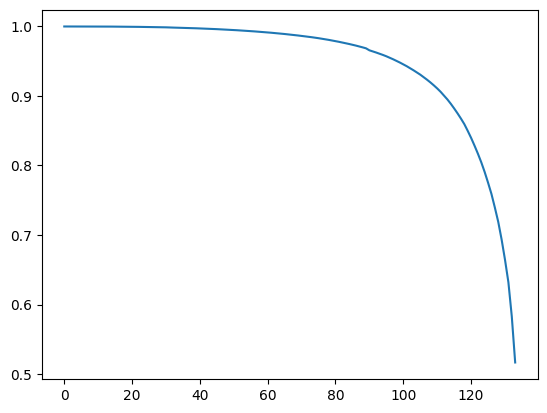

In [20]:
predicted = coxph.predict_survival(X_test)
plt.plot(predicted[5])

In [21]:
transformed_predictions = fix_predictions(predicted, times, int(T_train.max()))
transformed_predictions.shape

(84, 4795)

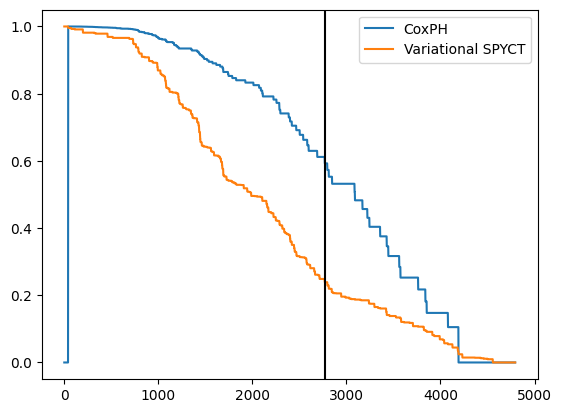

In [22]:
i = 30
plt.plot(transformed_predictions[i], label='CoxPH')
plt.plot(preds[i].mean(axis=0), label='Variational SPYCT')
plt.axvline(T_test[i], color='k')
plt.legend()

In [23]:
bs_test = calculate_bs((transformed_predictions, y_test))

In [24]:
bs_test2 = calculate_bs((preds.mean(axis=1), y_test))

In [25]:
bs_test3 = calculate_bs((preds_spyct, y_test))

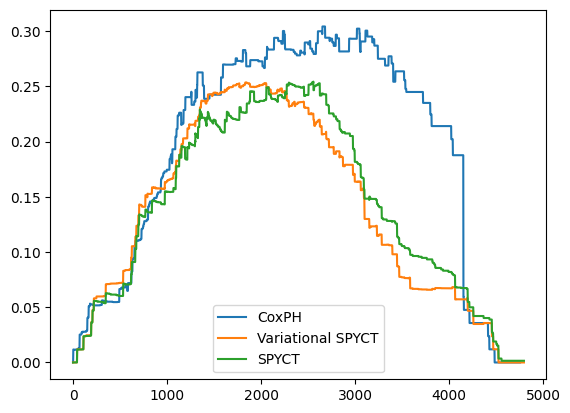

In [26]:
plt.plot(bs_test[41:], label='CoxPH')
plt.plot(bs_test2, label='Variational SPYCT')
plt.plot(bs_test3, label='SPYCT')
plt.legend()

In [ ]:
from pysurvival.models.survival_forest import RandomSurvivalForestModel

rsf = RandomSurvivalForestModel(num_trees=50)
rsf.fit(X_train, T_train, E_train, max_features="sqrt", max_depth=5)

In [ ]:
from pysurvival.models.multi_task import LinearMultiTaskModel